<a href="https://colab.research.google.com/github/eddorileo/saudeDigital/blob/main/nowshow_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ciência de Dados e Saúde Digital
##No Show Clínico
Facilitador: Éderson Dorileo, MSc, PhD

Fonte: [Kaggle](https://www.kaggle.com/datasets/joniarroba/noshowappointments)

Ferramentas de Apoio
1. Google Colab
2. Chat GPT
3. Python

###Orientação da Atividade:
Vamos criar um passo a passo para analisar dados de no show clinico. Criaremos um pipeline didático, para rodarmos em python, no colab. O objetivo é entender melhor a base, tratar dados nulos e inconsistências, identificar as variáveis mais relevantes e a melhor forma de enfrentar o no show na clinica.

##Fluxo de Trabalho
1. Importação das Bibliotecas Necessárias
2. Carregamento da Base de Dados
3. Entendimento da Base de Dados
4. Tratamento de Dados Nulos e Inconsistências
5. Análise Exploratória de Dados (Gráficos)
6. Identificação de Variáveis Relevantes
7. Construção de Modelos Preditivos
8. Conclusões e Recomendações

###1. Importação das Bibliotecas Necessárias
Vamos começar importando as bibliotecas essenciais para a análise.

In [1]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o estilo dos gráficos
sns.set(style="whitegrid")


###2. Carregamento da Base de Dados
Carregue o arquivo CSV para o ambiente de trabalho.

In [2]:
# Carregar a base de dados
df = pd.read_csv('no_show.csv')

# Visualizar as primeiras linhas da base de dados
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


###3. Entendimento da Base de Dados
É importante compreender a estrutura da base de dados.

In [3]:
# Informações sobre a base de dados
df.info()

# Estatísticas descritivas da base de dados
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


###4. Tratamento de Dados Nulos e Inconsistências
Verifique e trate valores nulos e inconsistências nos dados.

In [4]:
# Excluir as duas primeiras colunas
df = df.drop(df.columns[:2], axis=1)

# Exemplo: Verificar idade negativa
df = df[df['Age'] >= 0]

# Verificar duplicatas
df = df.drop_duplicates()

# Transformar a variável categórica 'No-show' em numérica
# Dados categóricos não são adequados para correlação Pearson
# Transformação está ok para correlação Spearman (ordinais ou binarios)
df['No-show'] = df['No-show'].map({'Yes': 1, 'No': 0})

# Transformar a variável categórica 'Gender' em numérica
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})

# Filtrar colunas numéricas, incluindo a variável target transformada
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Verificar valores nulos
df.isnull().sum()

# Remover valores nulos (se houver) nas colunas numéricas
df_numerical = df[numerical_cols].dropna()



###5. Análise Exploratória de Dados (Gráficos)
Explorando os dados para entender padrões e relações.

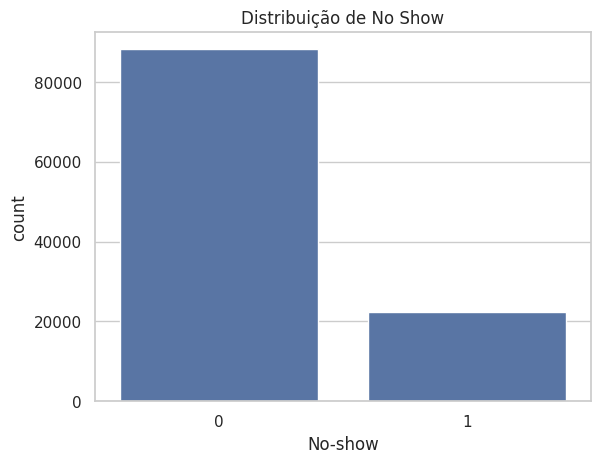

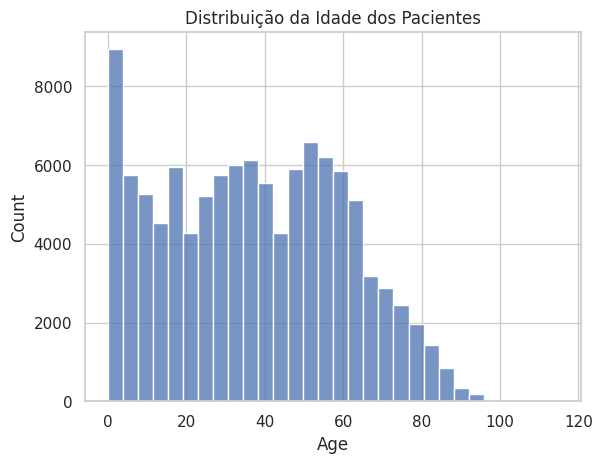

In [5]:

# Distribuição da variável target (No Show)
sns.countplot(x='No-show', data=df_numerical)
plt.title('Distribuição de No Show')
plt.show()

# Análise da idade dos pacientes
sns.histplot(df['Age'], bins=30)
plt.title('Distribuição da Idade dos Pacientes')
plt.show()



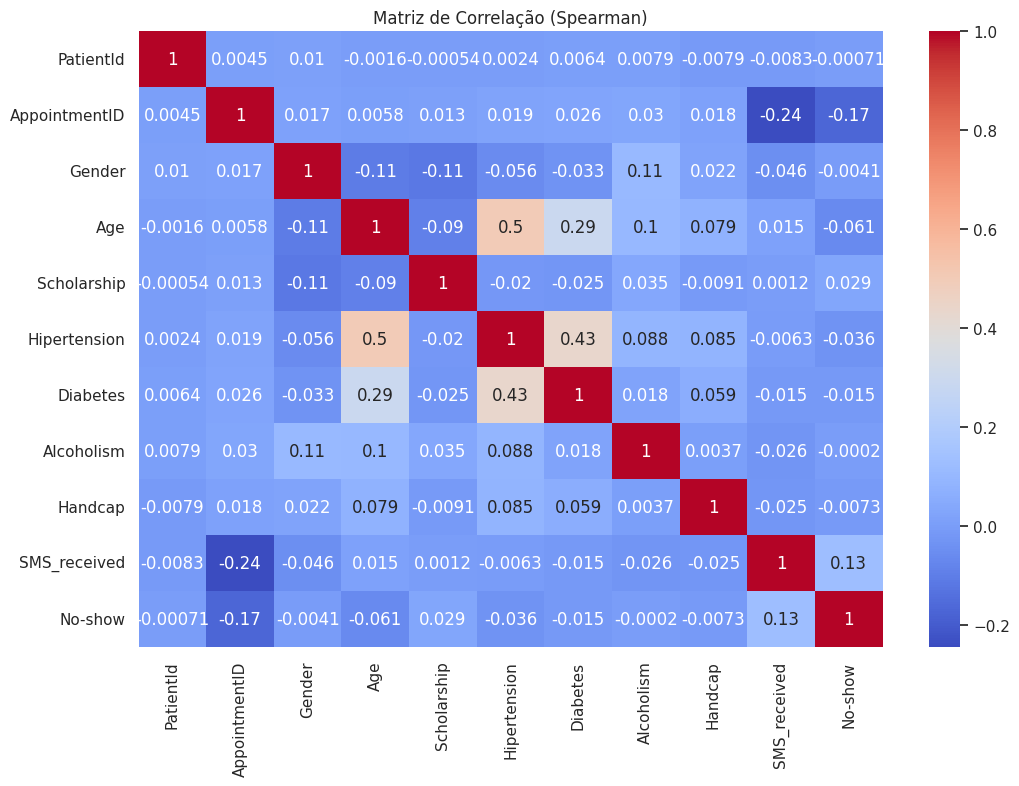

In [6]:
# Calcular e visualizar a matriz de correlação usando Spearman
plt.figure(figsize=(12, 8))
sns.heatmap(df_numerical.corr(method='spearman'), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação (Spearman)')
plt.show()

###6. Identificação das Variáveis Relevantes


In [ ]:

# Importar biblioteca para modelos de árvore de decisão
from sklearn.ensemble import RandomForestClassifier

# Preparar dados
X = df.drop(columns=['No-show'])
y = df['No-show']

# Converter variáveis categóricas para dummy/one-hot encoding
X = pd.get_dummies(X)

# Construir modelo de árvore de decisão
model = RandomForestClassifier()
model.fit(X, y)

# Importância das variáveis
importances = model.feature_importances_
features = X.columns
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Visualizar as variáveis mais importantes
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))
plt.title('Importância das Variáveis')
plt.show()

# Importar bibliotecas para divisão de dados e métricas de avaliação
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
print(f'Acurácia: {accuracy_score(y_test, y_pred)}')
print('Matriz de Confusão:')
print(confusion_matrix(y_test, y_pred))
print('Relatório de Classificação:')
print(classification_report(y_test, y_pred))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


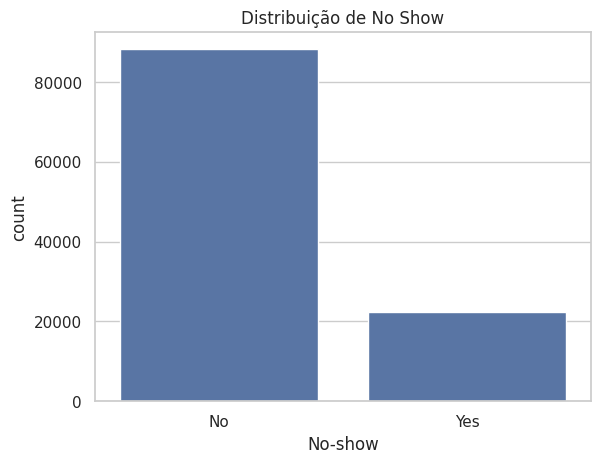

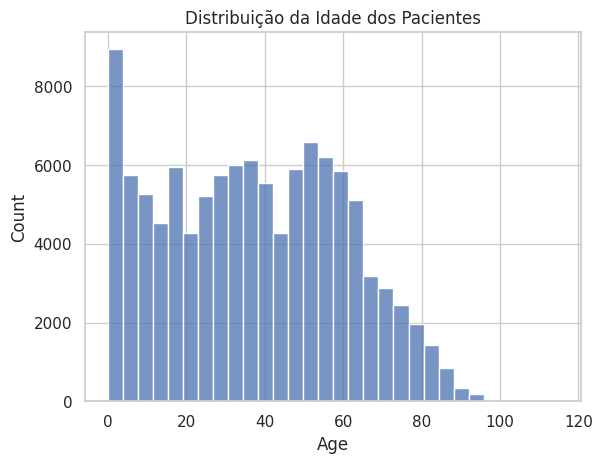

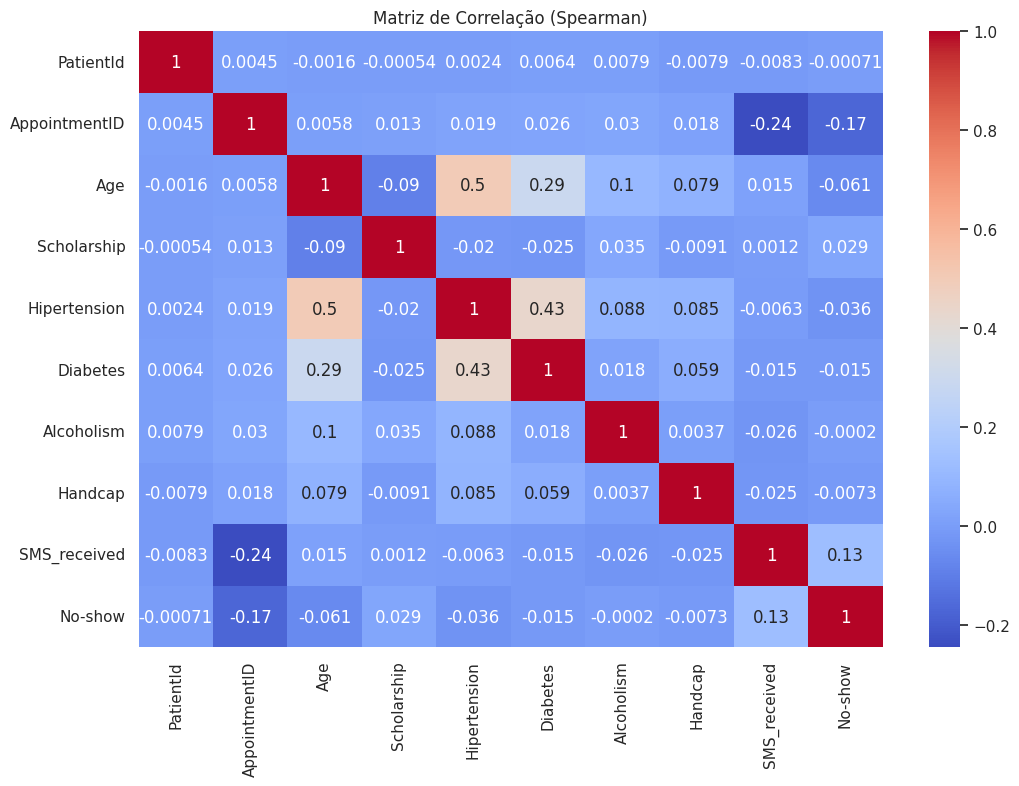

In [ ]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o estilo dos gráficos
sns.set(style="whitegrid")

# Carregar a base de dados
df = pd.read_csv('no_show.csv')

# Visualizar as primeiras linhas da base de dados
df.head()

# Informações sobre a base de dados
df.info()

# Estatísticas descritivas da base de dados
df.describe()

# Verificar valores nulos
df.isnull().sum()

# Tratar valores nulos (se necessário)
df = df.dropna()  # Exemplo: remover linhas com valores nulos

# Verificar inconsistências
# Exemplo: Verificar idade negativa
df = df[df['Age'] >= 0]

# Verificar duplicatas
df = df.drop_duplicates()

# Distribuição da variável target (No Show)
sns.countplot(x='No-show', data=df)
plt.title('Distribuição de No Show')
plt.show()

# Análise da idade dos pacientes
sns.histplot(df['Age'], bins=30)
plt.title('Distribuição da Idade dos Pacientes')
plt.show()

# Transformar a variável categórica 'No-show' em numérica
df['No-show'] = df['No-show'].map({'Yes': 1, 'No': 0})

# Filtrar colunas numéricas, incluindo a variável target transformada
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Remover valores nulos (se houver) nas colunas numéricas
df_numerical = df[numerical_cols].dropna()

# Calcular e visualizar a matriz de correlação usando Spearman
plt.figure(figsize=(12, 8))
sns.heatmap(df_numerical.corr(method='spearman'), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação (Spearman)')
plt.show()

# Importar biblioteca para modelos de árvore de decisão
from sklearn.ensemble import RandomForestClassifier

# Preparar dados
X = df.drop(columns=['No-show'])
y = df['No-show']

# Converter variáveis categóricas para dummy/one-hot encoding
X = pd.get_dummies(X)

# Construir modelo de árvore de decisão
model = RandomForestClassifier()
model.fit(X, y)

# Importância das variáveis
importances = model.feature_importances_
features = X.columns
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Visualizar as variáveis mais importantes
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))
plt.title('Importância das Variáveis')
plt.show()

# Importar bibliotecas para divisão de dados e métricas de avaliação
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
print(f'Acurácia: {accuracy_score(y_test, y_pred)}')
print('Matriz de Confusão:')
print(confusion_matrix(y_test, y_pred))
print('Relatório de Classificação:')
print(classification_report(y_test, y_pred))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


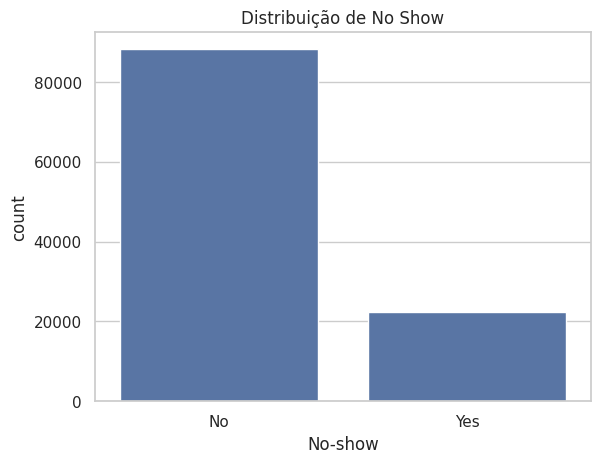

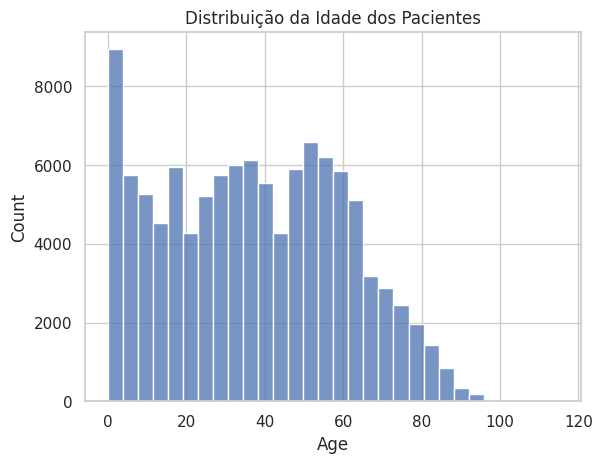

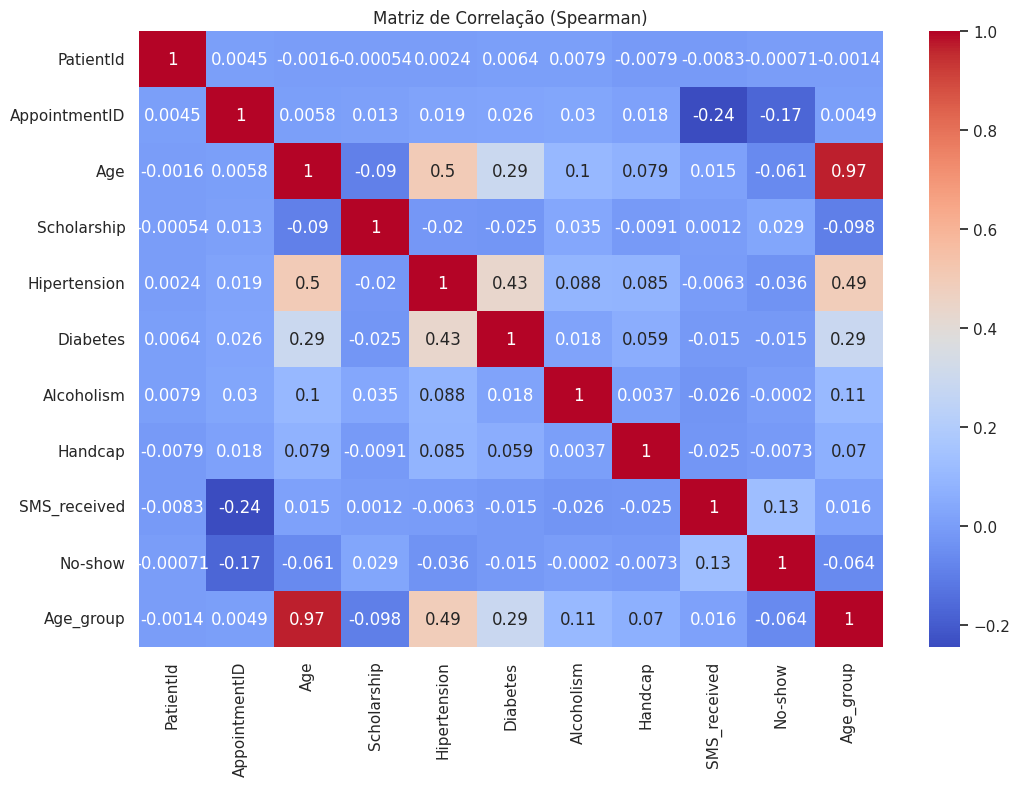

In [ ]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o estilo dos gráficos
sns.set(style="whitegrid")

# Carregar a base de dados
df = pd.read_csv('no_show.csv')

# Visualizar as primeiras linhas da base de dados
df.head()

# Informações sobre a base de dados
df.info()

# Estatísticas descritivas da base de dados
df.describe()

# Verificar valores nulos
df.isnull().sum()

# Tratar valores nulos (se necessário)
df = df.dropna()  # Exemplo: remover linhas com valores nulos

# Verificar inconsistências
# Exemplo: Verificar idade negativa
df = df[df['Age'] >= 0]

# Verificar duplicatas
df = df.drop_duplicates()

# Distribuição da variável target (No Show)
sns.countplot(x='No-show', data=df)
plt.title('Distribuição de No Show')
plt.show()

# Análise da idade dos pacientes
sns.histplot(df['Age'], bins=30)
plt.title('Distribuição da Idade dos Pacientes')
plt.show()

# Transformar a variável categórica 'No-show' em numérica
df['No-show'] = df['No-show'].map({'Yes': 1, 'No': 0})

# Criar grupos de idade
bins = [0, 20, 40, 60, np.inf]
labels = ['0-20', '20-40', '40-60', '60+']
df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Converter a coluna 'Age_group' em numérica para a correlação
df['Age_group'] = df['Age_group'].cat.codes

# Filtrar colunas numéricas, incluindo a variável target transformada e grupos de idade
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Remover valores nulos (se houver) nas colunas numéricas
df_numerical = df[numerical_cols].dropna()

# Calcular e visualizar a matriz de correlação usando Spearman
plt.figure(figsize=(12, 8))
sns.heatmap(df_numerical.corr(method='spearman'), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação (Spearman)')
plt.show()
